In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfA = pd.read_csv('../Data/JSSRawArrests.csv',low_memory=False)

In [3]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204739 entries, 0 to 204738
Data columns (total 41 columns):
ID                    204739 non-null int64
AB_RT                 204739 non-null object
AB_RIN                204739 non-null float64
ARREST_TYPE           204739 non-null object
Arrest_RIN            204739 non-null float64
ArrestPrimaryKey      204739 non-null object
ARREST_OFFICER1       203101 non-null object
ORGANIZATION          201163 non-null object
CURRENT_STATUS        204739 non-null object
RECORDS_AR_COURT_A    204648 non-null object
ARREST_REASON         204603 non-null object
ARREST_DATE           204739 non-null object
ARREST_TIME           204720 non-null float64
ArrestLocation        204328 non-null object
ArrestCounty          164401 non-null float64
ArrestDistrict        164422 non-null object
ArrestsZone           164407 non-null object
YOUNG_OFFENDER        204739 non-null object
JUVENILE_STATUS       13092 non-null object
Arrests_X             164144 non

In [4]:
dfA['Arrest_RIN'].nunique()

102645

In [5]:
dfA['PIN'].nunique()

63205

In [6]:
dfA['ArrestPrimaryKey'].nunique()

102645

In [7]:
numMatch = dfA['AB_RIN']==dfA['Arrest_RIN']

In [8]:
numMatch.value_counts()

True    204739
dtype: int64

In [9]:
dfA['AB_RT'].nunique()

1

In [10]:
dfA['PIN'].value_counts().head()

458027047.0    183
78577921.0     152
356649615.0     91
457926932.0     62
322964098.0     53
Name: PIN, dtype: int64

### -Hmm... a unique PIN with 183 arrests sounds a little off

In [11]:
arrests = dfA.drop_duplicates(subset=['ArrestPrimaryKey','PIN'])
timesArrested = pd.DataFrame({'PIN': arrests['PIN'].value_counts().index,
                             'Times_Arrested': arrests['PIN'].value_counts().values})
unqPeople = dfA.drop_duplicates(subset='PIN')
personNumArrests = unqPeople.merge(timesArrested,on='PIN')
repArrestees = personNumArrests[personNumArrests['Times_Arrested']>1]

In [12]:
arrests['PIN'].value_counts().head()

458153247.0    46
309723772.0    46
169937969.0    44
424673612.0    42
169345546.0    42
Name: PIN, dtype: int64

In [13]:
len(arrests)

102983

In [14]:
len(repArrestees)

16768

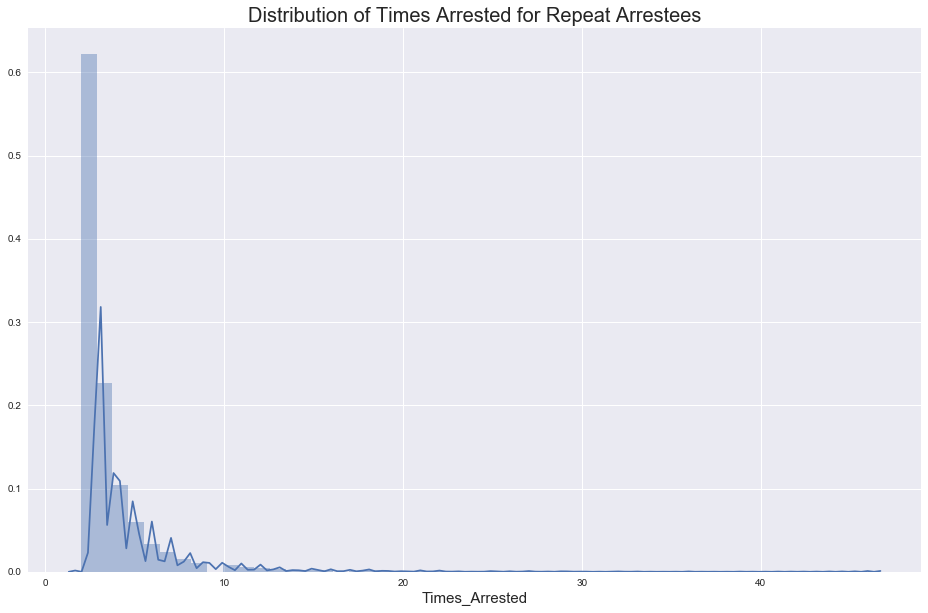

In [14]:
plt.figure(figsize=(16,10))
sns.distplot(repArrestees['Times_Arrested'])
plt.title('Distribution of Times Arrested for Repeat Arrestees',fontsize=20)
plt.xlabel('Times_Arrested',fontsize=15)

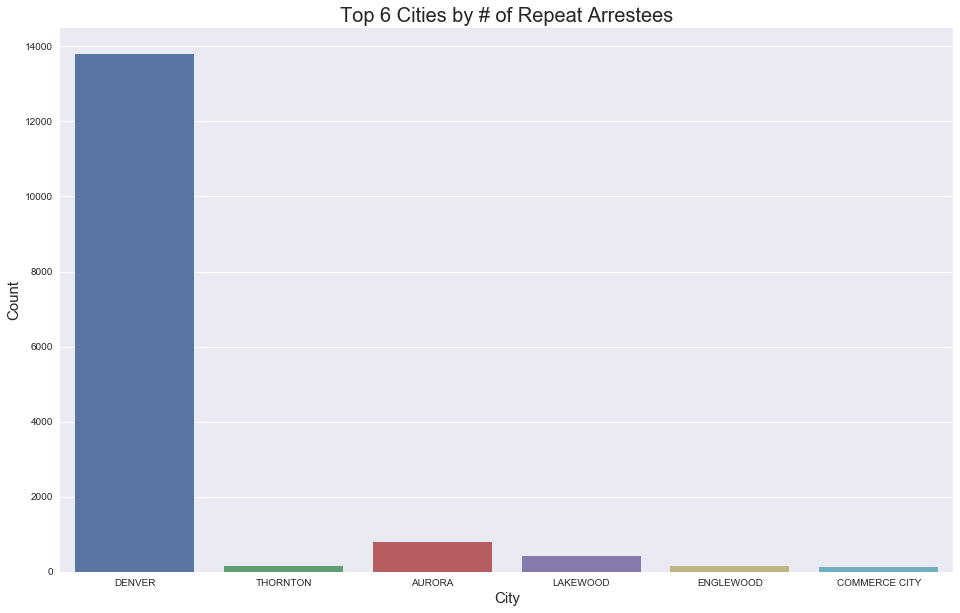

In [15]:
topRepArrCities = repArrestees['CITY'].value_counts().head(6)
plt.figure(figsize=(16,10))
sns.countplot(repArrestees[repArrestees['CITY'].isin(topRepArrCities.index)]['CITY'])
plt.title('Top 6 Cities by # of Repeat Arrestees',size=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [16]:
topCities = ['DENVER','AURORA','LAKEWOOD','THORNTON','ENGLEWOOD','COMMERCE CITY']
topCititesExDen = ['AURORA','LAKEWOOD','THORNTON','ENGLEWOOD','COMMERCE CITY']

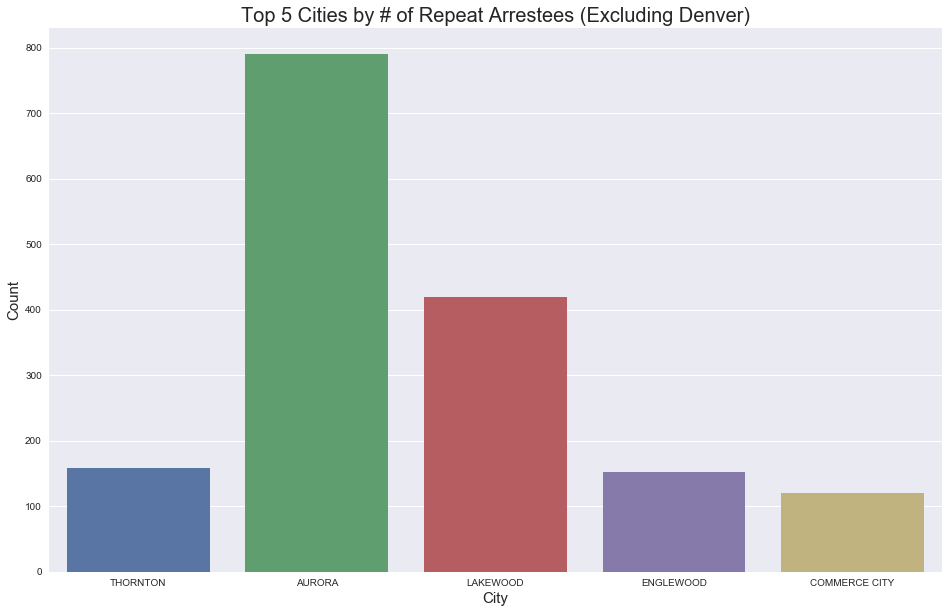

In [17]:
plt.figure(figsize=(16,10))
sns.countplot(repArrestees[repArrestees['CITY'].isin(topCititesExDen)]['CITY'])
plt.title('Top 5 Cities by # of Repeat Arrestees (Excluding Denver)',size=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [18]:
dfA['ARREST_OFFICER1'].nunique()

1502

In [19]:
dfA['ARREST_OFFICER1'].value_counts().head()

P96028    3401
P06099    2901
P06159    2117
P79028    2081
P13001    1927
Name: ARREST_OFFICER1, dtype: int64

In [20]:
dfA[dfA['ARREST_OFFICER1']=='P96028']['CITY'].value_counts().head()

DENVER           3143
AURORA            105
LAKEWOOD           15
COMMERCE CITY      13
ENGLEWOOD          12
Name: CITY, dtype: int64

### -Since officers are not restricted to one city, focus on total (unique) officers that have made arrests in each city and not amount of arrests

In [21]:
cityOfficer = dfA.drop_duplicates(subset=['CITY','ARREST_OFFICER1'])
cityOfficerTotals = pd.DataFrame({'CITY': cityOfficer['CITY'].value_counts().index,
                               'Total_Arr_Officers': cityOfficer['CITY'].value_counts().values})
df = repArrestees.merge(cityOfficerTotals,on='CITY')

Int64Index([1439, 960, 725, 539, 506, 466], dtype='int64')

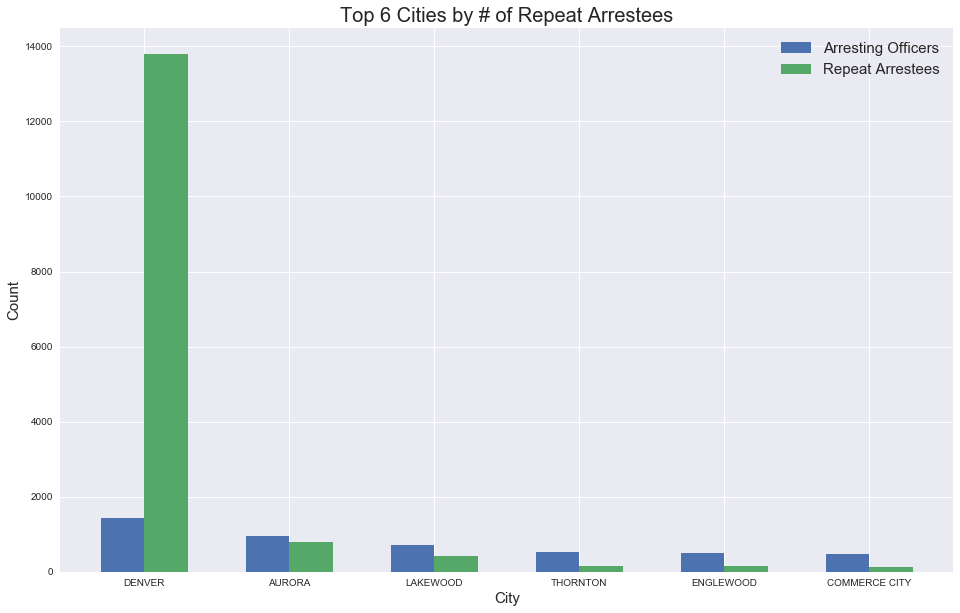

In [22]:
bw = .3
index = np.arange(6)
plt.figure(figsize=(16,10))
plt.bar(index,df[df['CITY'].isin(topCities)]['Total_Arr_Officers'].value_counts().index,width=.3)
plt.bar(index+bw,df[df['CITY'].isin(topCities)]['CITY'].value_counts().values,width=.3)
plt.legend(['Arresting Officers','Repeat Arrestees'],fontsize=15)
plt.xticks(index+.5*bw,topCities)
plt.ylabel('Count',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.title('Top 6 Cities by # of Repeat Arrestees',fontsize=20)
df[df['CITY'].isin(topCities)]['Total_Arr_Officers'].value_counts().index

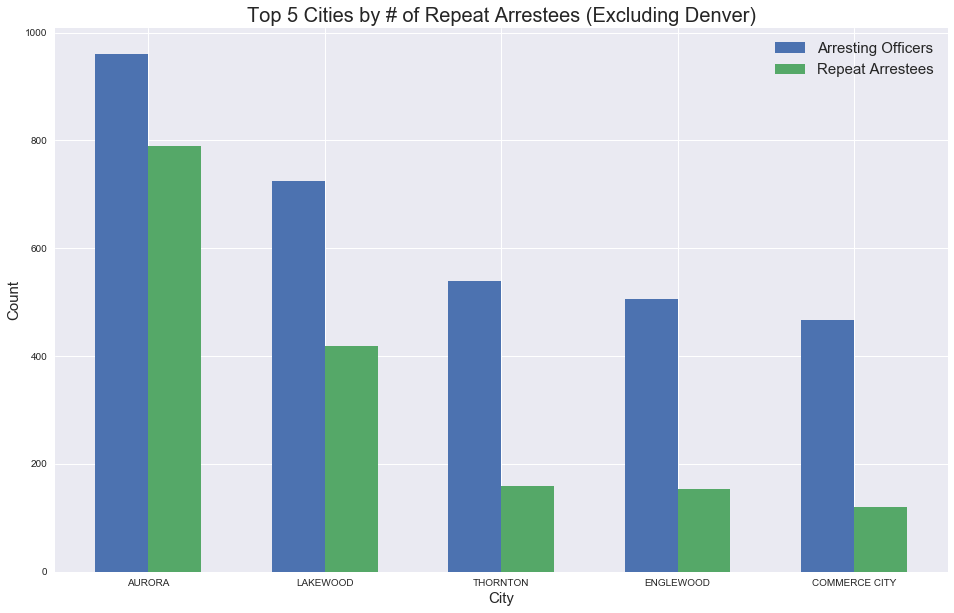

In [23]:
bw = .3
index = np.arange(5)
plt.figure(figsize=(16,10))
plt.bar(index,df[df['CITY'].isin(topCititesExDen)]['Total_Arr_Officers'].value_counts().index,width=.3)
plt.bar(index+bw,df[df['CITY'].isin(topCititesExDen)]['CITY'].value_counts().values,width=.3)
plt.xticks(index+.5*bw,topCititesExDen)
plt.legend(['Arresting Officers','Repeat Arrestees'],fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.title('Top 5 Cities by # of Repeat Arrestees (Excluding Denver)',fontsize=20)

In [24]:
repArresteeOfficerRatio = pd.DataFrame({'Top 6 Cities': topCities,
                                      'Repeat Arrestees': topRepArrCities.values,
                                      'Arresting Officers': df[df['CITY'].isin(topCities)]['Total_Arr_Officers'].value_counts().index,
                                      'Repeat Arrestees/Arresting Officers': (topRepArrCities.values/(df[df['CITY'].isin(topCities)]['Total_Arr_Officers'].value_counts().index + 0.0))})
repArresteeOfficerRatio

,Arresting Officers,Repeat Arrestees,Repeat Arrestees/Arresting Officers,Top 6 Cities
0,1439,13793,9.585129,DENVER
1,960,790,0.822917,AURORA
2,725,419,0.577931,LAKEWOOD
3,539,159,0.294991,THORNTON
4,506,153,0.302372,ENGLEWOOD
5,466,120,0.257511,COMMERCE CITY


## Notes:
---
### -AB_RT has one value
### -AB_RIN and Arrest_RIN are the same
### -Arrest_RIN has the same number of unique values as ArrestPrimaryKey but different values when compared to eachother, use ArrestPrimaryKey because this can be used to link to other datasets if need be
### -Top arrested person was arrested 46 times
### -16,768 repeat arrestees
### -1,502 officers, they arrest offenders in multiple cities